# 491 - Final Project

After studying class 491, I have deep comprehension about bayes rules. I thought bayes rule can be used in illness classification. So in my final project, I created two little bayes networks to classify illness according to the pain.

There are three important parts in our leg area: knee, ankle and leg muscle. We know that, if a person doesn't exercise enough, it will make these three parts stiffness and stiffness will cause pain. And there three parts also can have bad injuries: knee fracture, ankle fracture and injured leg. There bad injuries will also cause pain. So can we find a way to tell the pain is caused by lack of training or bad injuries?

This is the picture of my model.  
In my project, the yellow parts are the bad injuries or stiffness. And their own symptoms also show in the model.  
I use pain level and frequency of pain as the observed value.  
Only use pain as measured value is not reasonable, stiffness and bad injuries all have their own symptoms, so I have to put this factor into it. 

Now,I will explain my model.  
The top one, lack of training, this factor will cause the stiffness of knee, ankle and leg muscle.  
For each body part, I think we have to consider bad injuries more than stiffness, because we would rather regard stiffness as bad injuries than regard bad injuries as stiffness. So I use two either factors, one is tell wehter the bad injuries or stiffness, another one is adding some symptoms to the model to make sure do not regard bad injuries as stiffness. For each body part, the structure are same: stiffness has one own symptom, bad injury has two own symptoms. And either stiffness or bad injury cause pain. The symptoms of bad injury also cause pain. 
Pain level and frequency of pain both have three value: low, medium and high. Different value will influence the treatment. 
And I add an additional part, just for using both factor.  

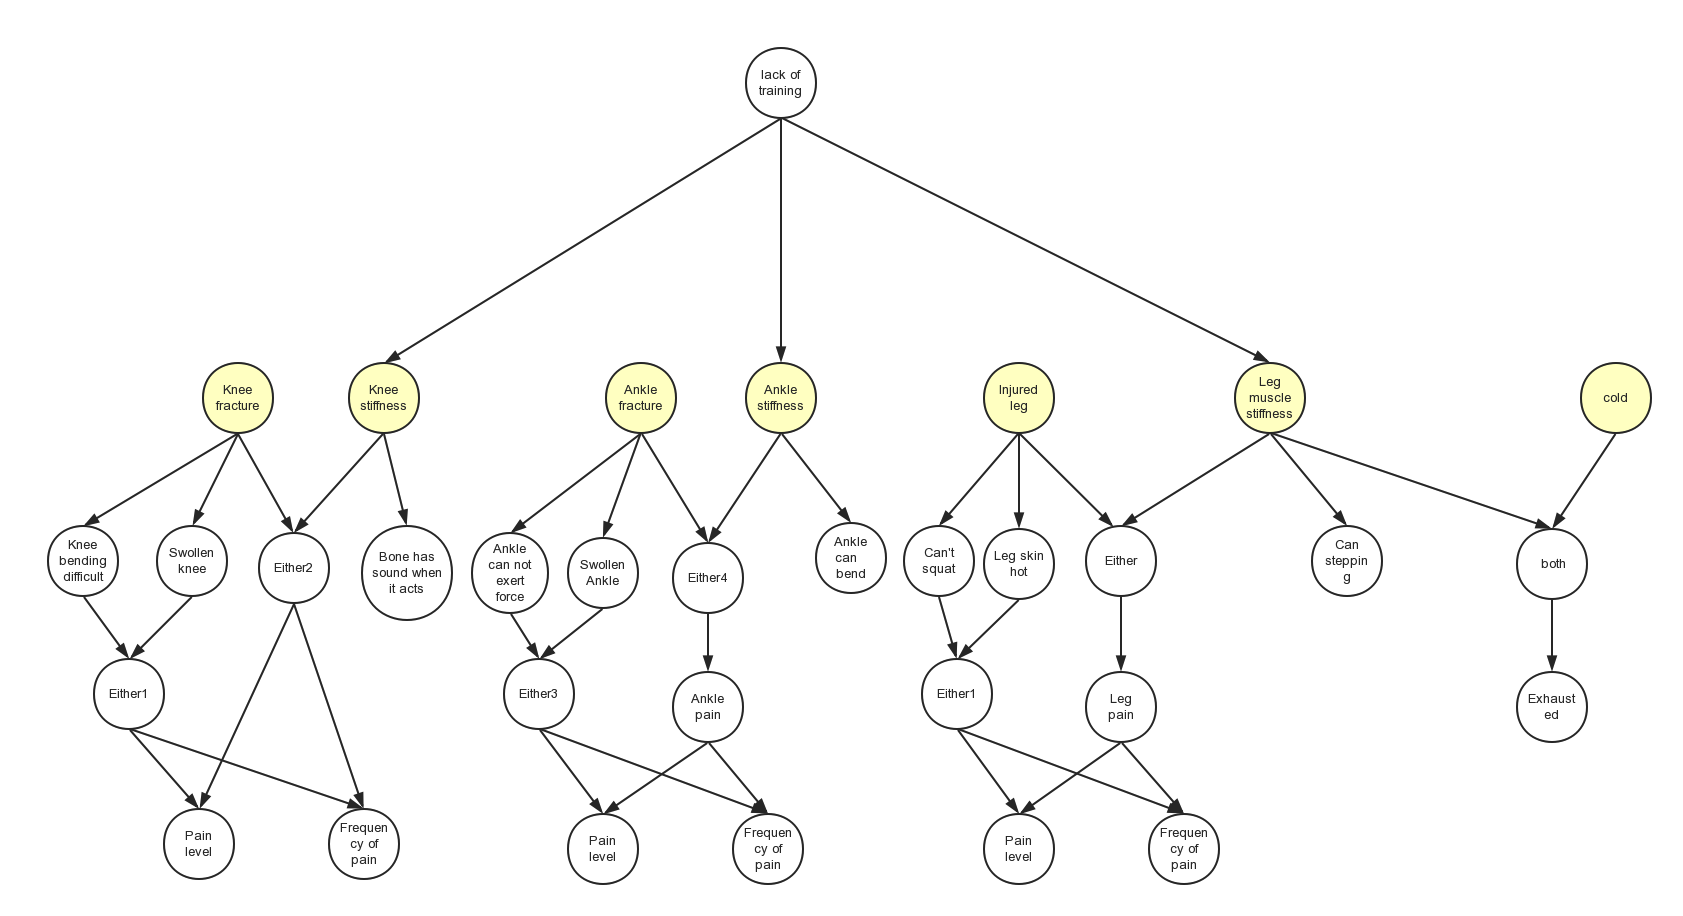

Actually, I should use real data to calculate the probabilities, but I cannot get the data. So, in application, this model need more professional data to make the model better.

Here are the probabilities:

1.  
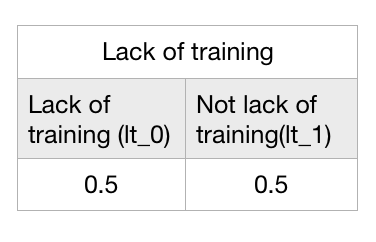

2.For knee: 
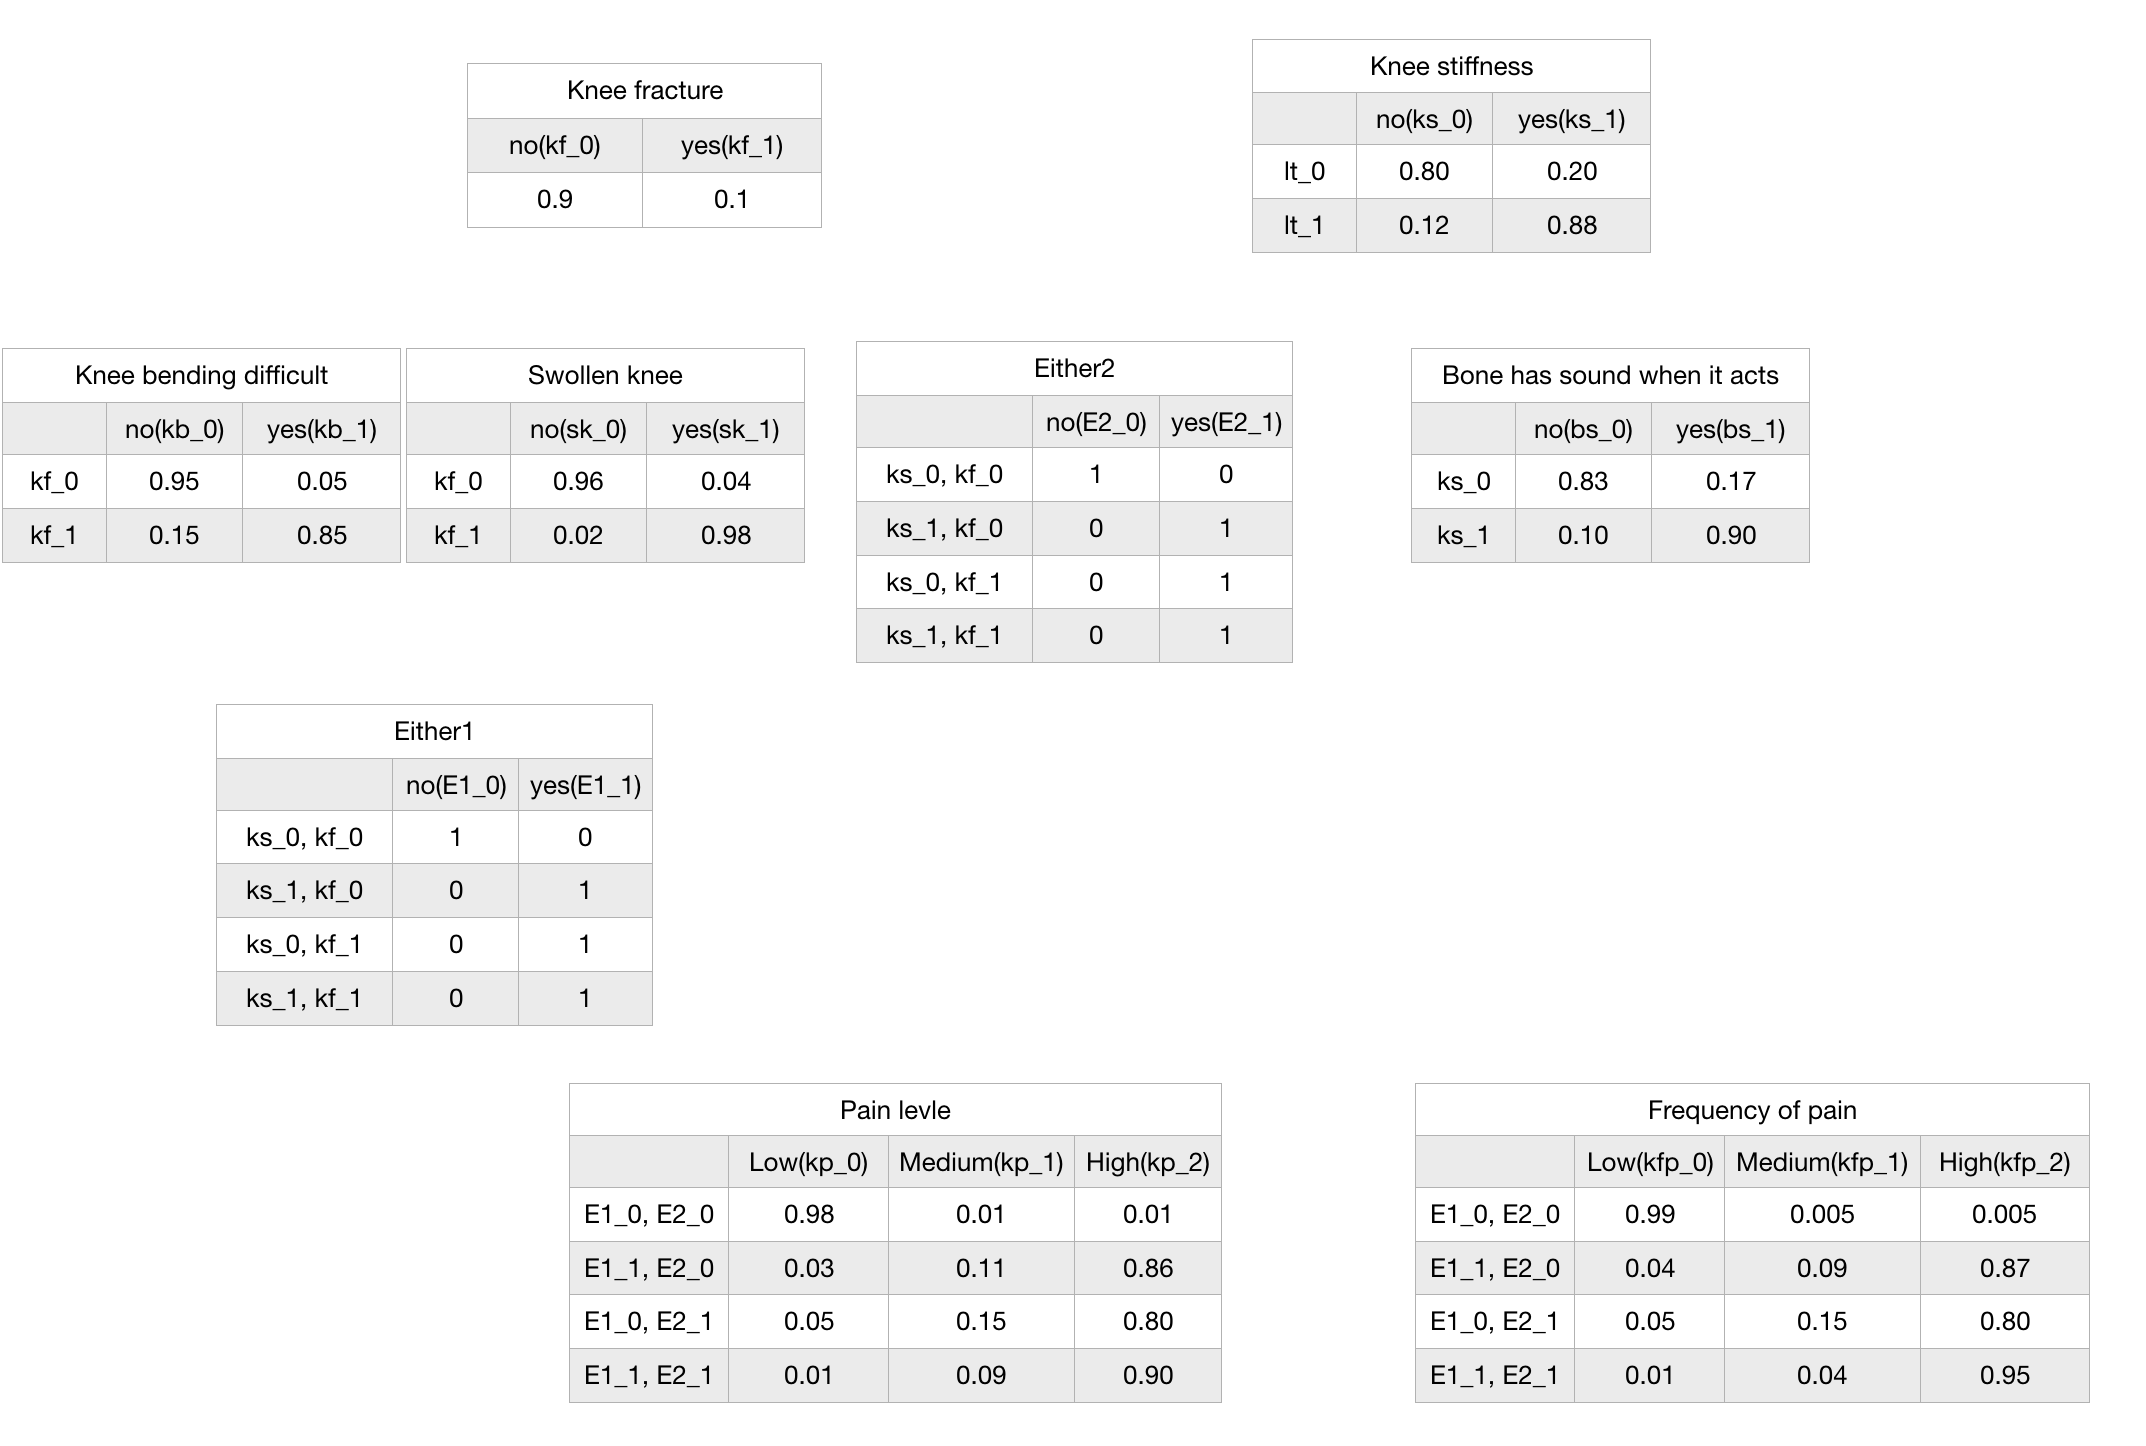

3.For ankle: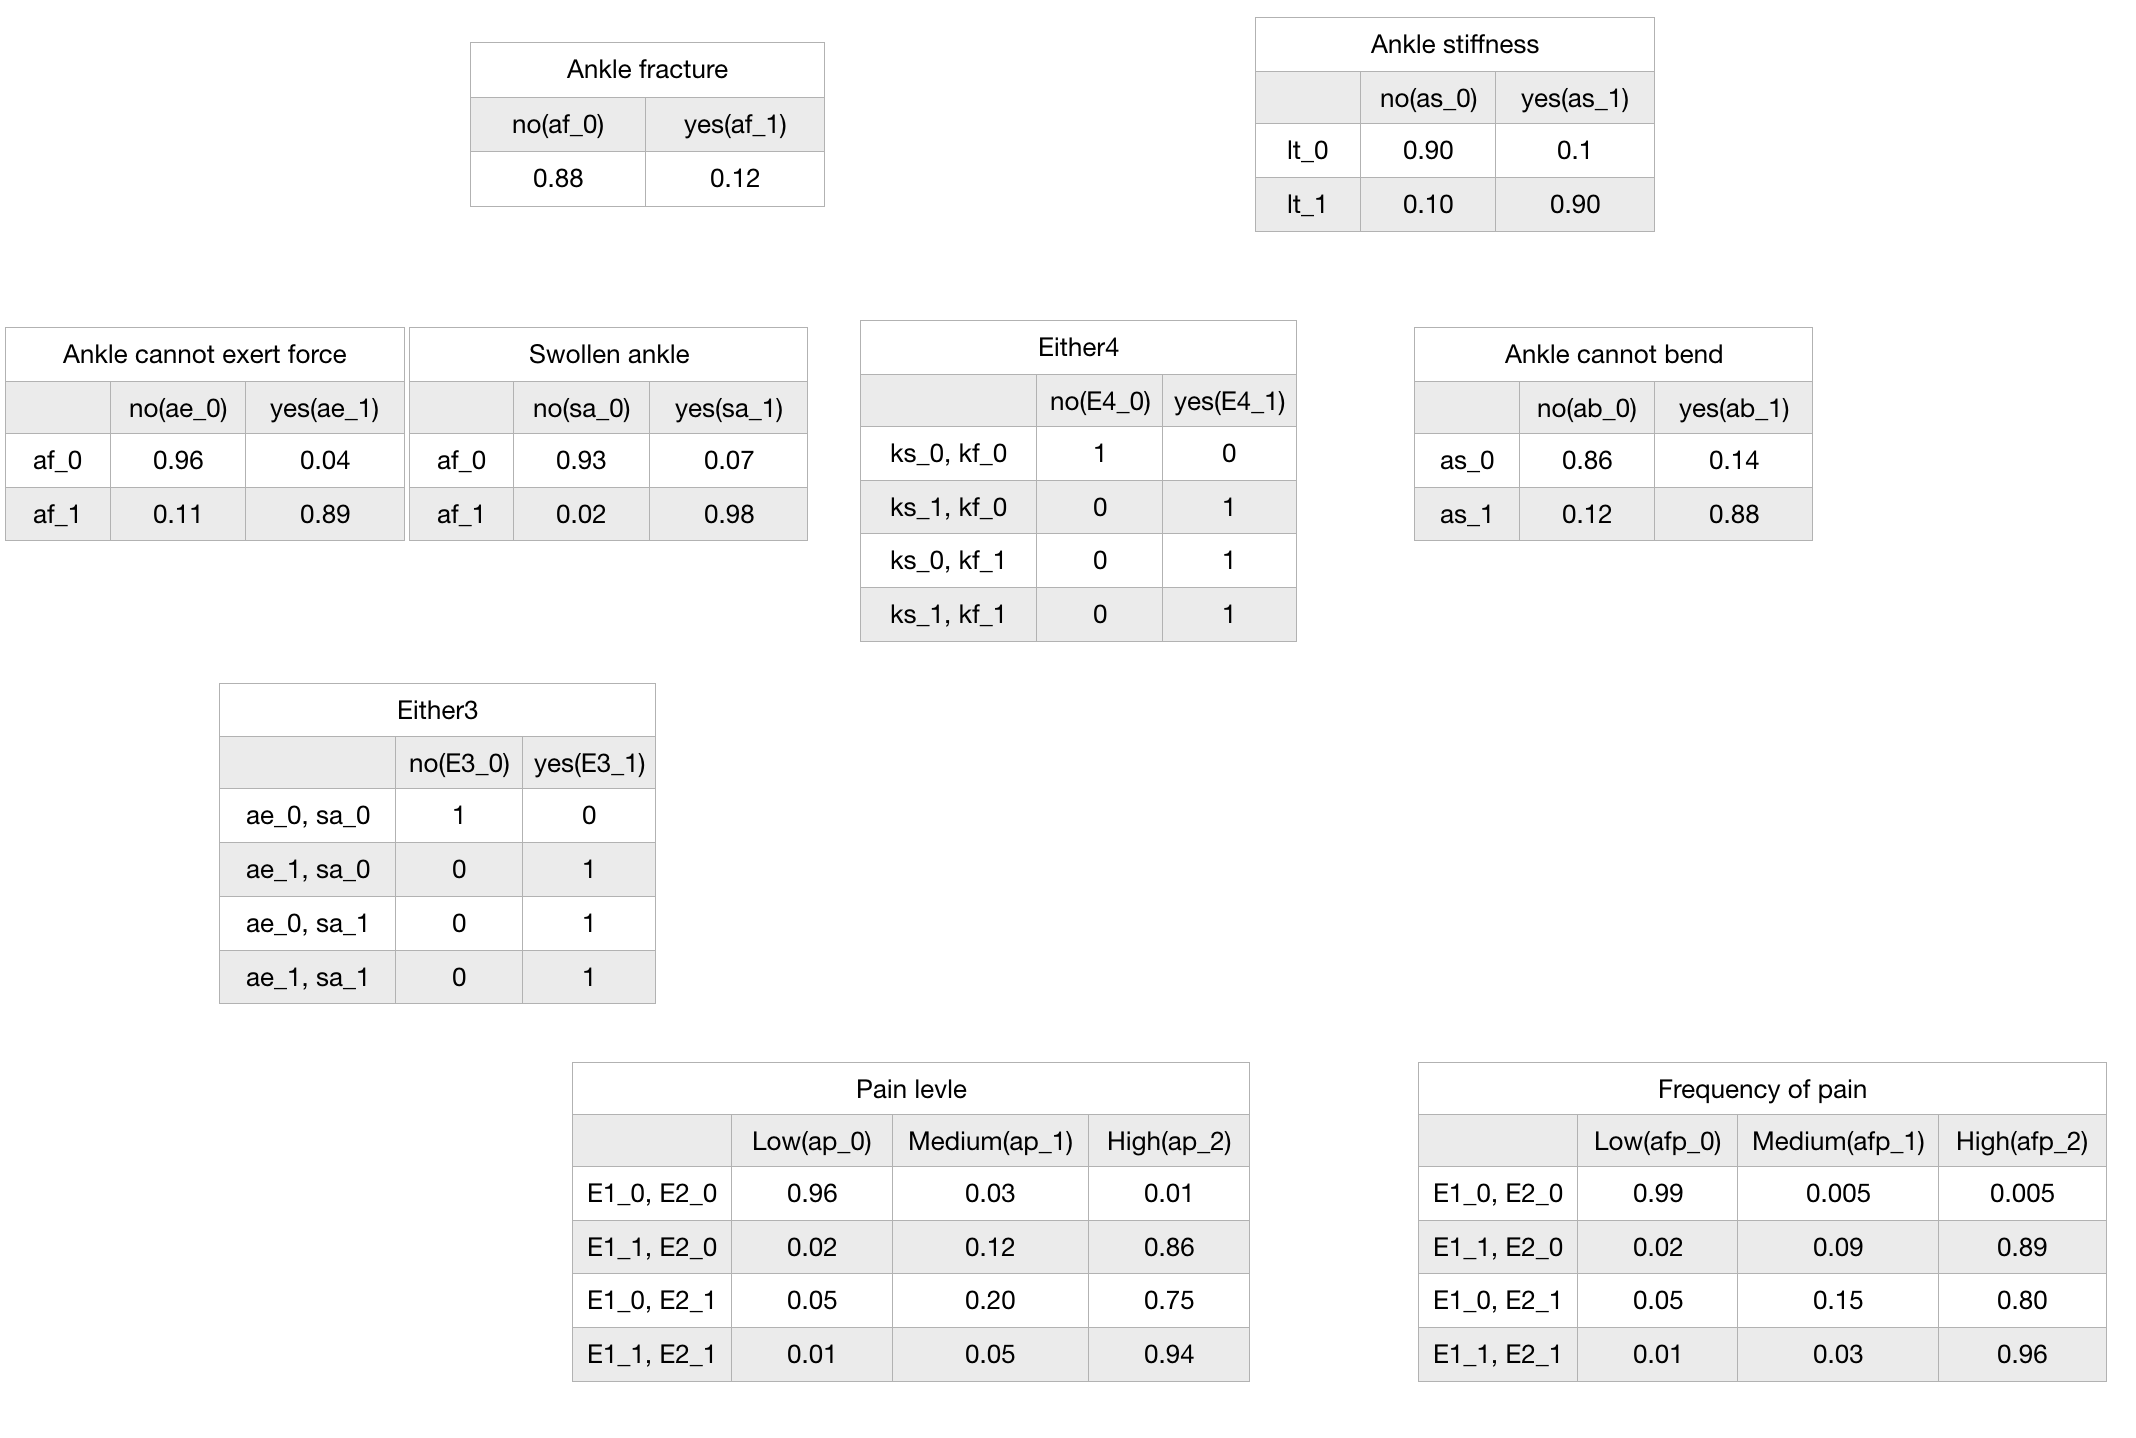

4.For leg: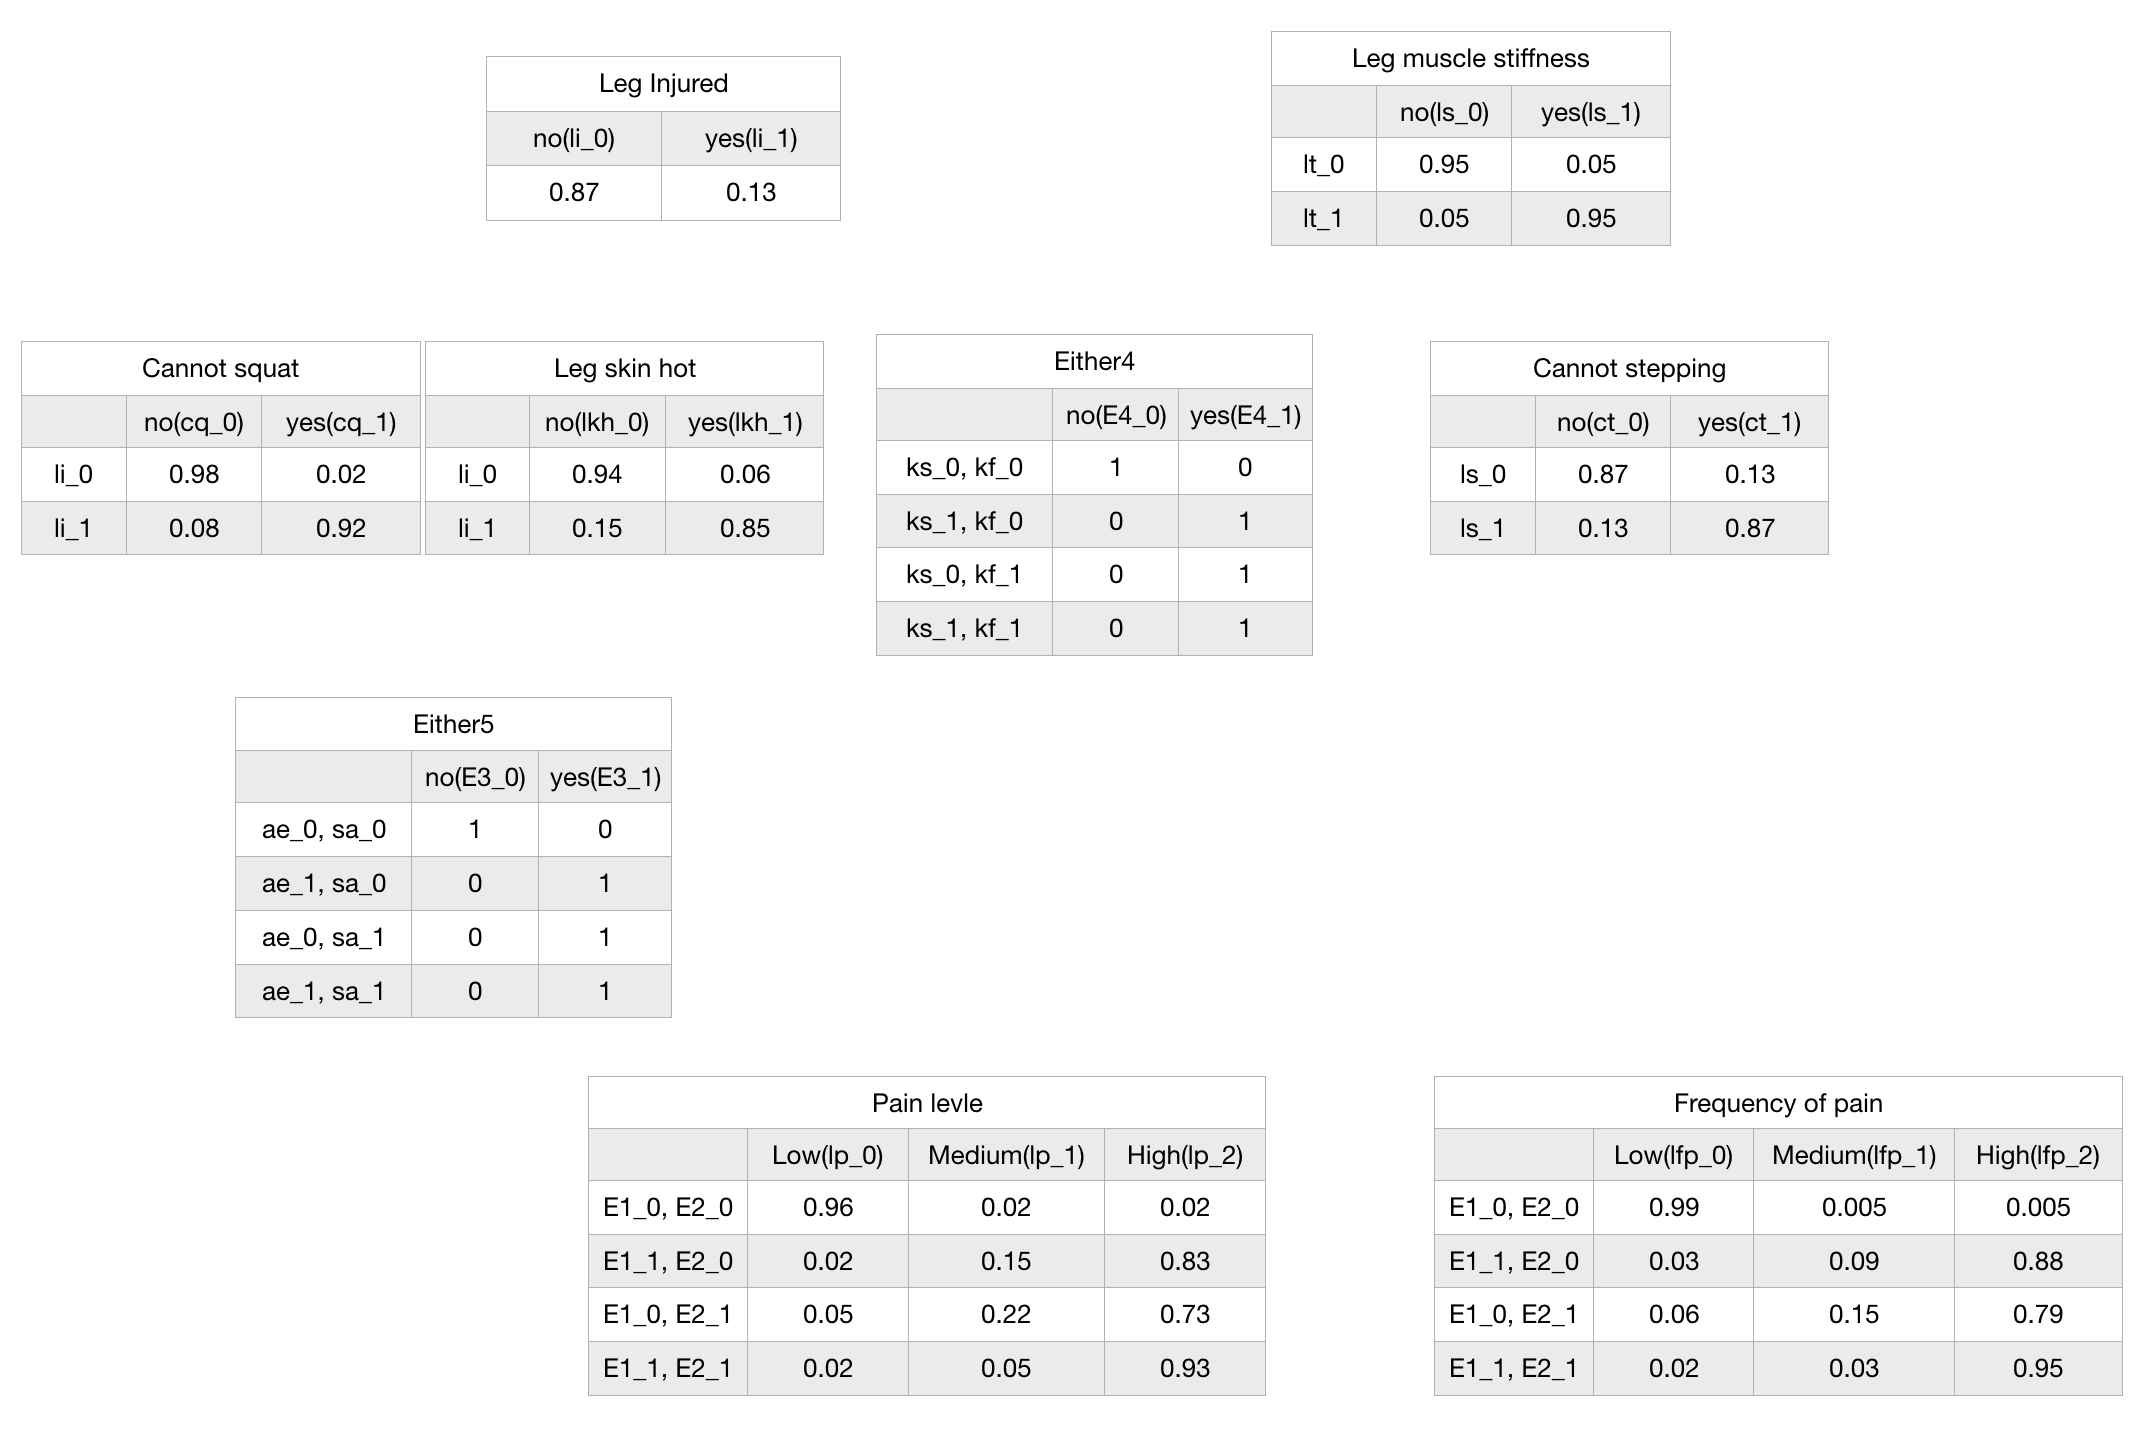

5.additional part
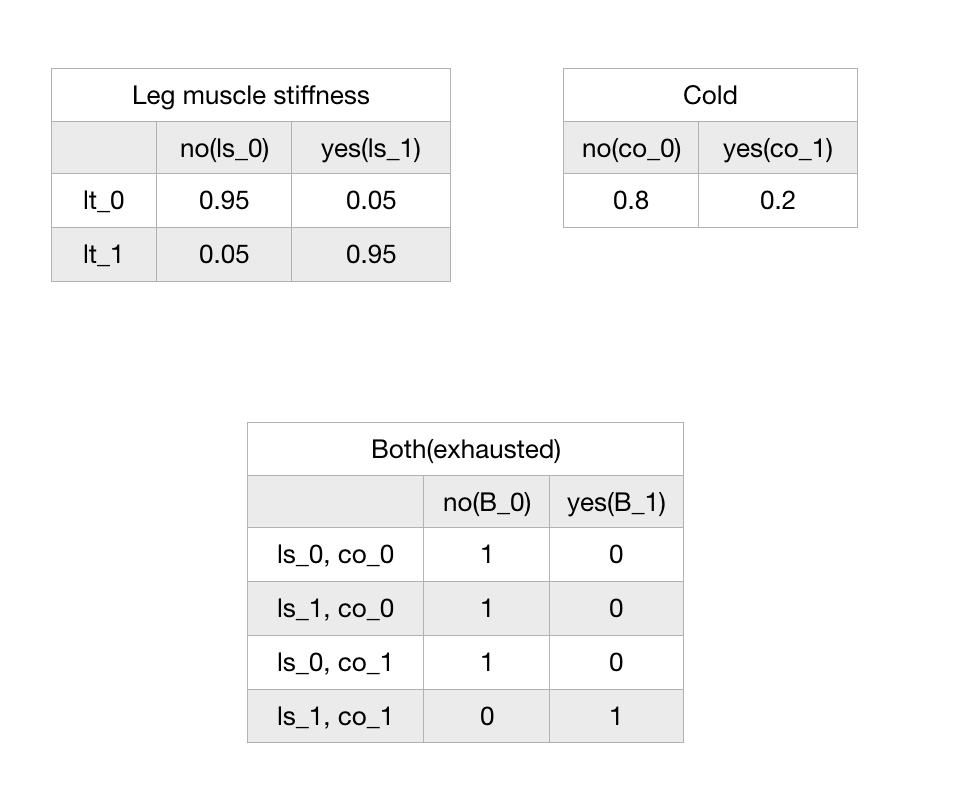

In [1]:
from pgmpy.models import BayesianModel as bysmodel
from pgmpy.factors.discrete import TabularCPD as tcpd

In [2]:
model = bysmodel([('lt','ks'),('lt','as'),('lt','ls'),
                  ('kf','kb'),('kf','sk'),('kf','E2'),
                  ('kb','E1'),('sk','E1'),
                  ('ks','bs'),('ks','E2'),
                  ('E1','kp'),('E1','kfp'),
                  ('E2','kp'),('E2','kfp'),
                  ('af','ae'),('af','sa'),('af','E4'),
                  ('ae','E3'),('sa','E3'),
                  ('as','ab'),('as','E4'),
                  ('E3','ap'),('E3','afp'),
                  ('E4','ap'),('E4','afp'),
                  ('li','cq'),('li','lkh'),('li','E6'),
                  ('cq','E5'),('lkh','E5'),
                  ('ls','ct'),('ls', 'E6'),
                  ('E5','lp'),('E5','lfp'),
                  ('E6','lp'),('E6','lfp'),
                  ('ls','B'),('co','B')])

In [3]:
priorlt = tcpd(variable='lt', variable_card=2, values=[[0.5, 0.5]])
priorkf = tcpd(variable='kf', variable_card=2, values=[[0.9, 0.1]])
prioraf = tcpd(variable='af', variable_card=2, values=[[0.88, 0.12]])
priorli = tcpd(variable='li', variable_card=2, values=[[0.87, 0.13]])
priorco = tcpd(variable='co', variable_card=2, values=[[0.8, 0.2]])

In [4]:
cpdks = tcpd(variable='ks', variable_card=2, 
            evidence=['lt'], evidence_card=[2], 
            values=[[0.8, 0.12],  
                    [0.2, 0.88]])
cpdas = tcpd(variable='as', variable_card=2, 
            evidence=['lt'], evidence_card=[2], 
            values=[[0.9, 0.1],  
                    [0.1, 0.9]])
cpdls = tcpd(variable='ls', variable_card=2, 
            evidence=['lt'], evidence_card=[2], 
            values=[[0.95, 0.05],  
                    [0.05, 0.95]])

cpdkb = tcpd(variable='kb', variable_card=2, 
            evidence=['kf'], evidence_card=[2], 
            values=[[0.95, 0.15],  
                    [0.05, 0.85]])
cpdsk = tcpd(variable='sk', variable_card=2, 
            evidence=['kf'], evidence_card=[2], 
            values=[[0.96, 0.02],  
                    [0.04, 0.98]])
cpdbs = tcpd(variable='bs', variable_card=2, 
            evidence=['ks'], evidence_card=[2], 
            values=[[0.83, 0.10],  
                    [0.17, 0.90]])
cpdE1 = tcpd(variable='E1', variable_card=2, 
            evidence=['kb', 'sk'], evidence_card=[2, 2], 
            values=[[1,0,0,0], 
                    [0,1,1,1]])
cpdE2 = tcpd(variable='E2', variable_card=2, 
            evidence=['ks', 'kf'], evidence_card=[2, 2], 
            values=[[1,0,0,0], 
                    [0,1,1,1]])
cpdkp = tcpd(variable='kp',variable_card=3, 
            evidence=['E1','E2'],evidence_card=[2, 2],
            values=[[0.98,0.03,0.05,0.01],
                    [0.01,0.11,0.15,0.09],
                    [0.01,0.86,0.8,0.90]])
cpdkfp = tcpd(variable='kfp',variable_card=3, 
            evidence=['E1','E2'],evidence_card=[2, 2],
            values=[[0.99,0.04,0.05,0.01],
                    [0.005,0.09,0.15,0.04],
                    [0.005,0.87,0.8,0.95]])


cpdae = tcpd(variable='ae', variable_card=2, 
            evidence=['af'], evidence_card=[2], 
            values=[[0.96, 0.11],  
                    [0.04, 0.89]])
cpdsa = tcpd(variable='sa', variable_card=2, 
            evidence=['af'], evidence_card=[2], 
            values=[[0.93, 0.02],  
                    [0.07, 0.98]])
cpdab = tcpd(variable='ab', variable_card=2, 
            evidence=['as'], evidence_card=[2], 
            values=[[0.86, 0.12],  
                    [0.14, 0.88]])
cpdE3 = tcpd(variable='E3', variable_card=2, 
            evidence=['ae', 'sa'], evidence_card=[2, 2], 
            values=[[1,0,0,0], 
                    [0,1,1,1]])
cpdE4 = tcpd(variable='E4', variable_card=2, 
            evidence=['as', 'af'], evidence_card=[2, 2], 
            values=[[1,0,0,0], 
                    [0,1,1,1]])
cpdap = tcpd(variable='ap',variable_card=3, 
            evidence=['E3','E4'],evidence_card=[2, 2],
            values=[[0.96,0.02,0.05,0.01],
                    [0.03,0.12,0.20,0.05],
                    [0.01,0.86,0.75,0.94]])
cpdafp = tcpd(variable='afp',variable_card=3, 
            evidence=['E3','E4'],evidence_card=[2, 2],
            values=[[0.99,0.02,0.05,0.01],
                    [0.005,0.09,0.15,0.03],
                    [0.005,0.89,0.8,0.96]])


cpdcq = tcpd(variable='cq', variable_card=2, 
            evidence=['li'], evidence_card=[2], 
            values=[[0.98, 0.08],  
                    [0.02, 0.92]])
cpdlkh = tcpd(variable='lkh', variable_card=2, 
            evidence=['li'], evidence_card=[2], 
            values=[[0.94, 0.15],  
                    [0.06, 0.85]])
cpdct = tcpd(variable='ct', variable_card=2, 
            evidence=['ls'], evidence_card=[2], 
            values=[[0.87, 0.13],  
                    [0.13, 0.87]])
cpdE5 = tcpd(variable='E5', variable_card=2, 
            evidence=['cq', 'lkh'], evidence_card=[2, 2], 
            values=[[1,0,0,0], 
                    [0,1,1,1]])
cpdE6 = tcpd(variable='E6', variable_card=2, 
            evidence=['ls', 'li'], evidence_card=[2, 2], 
            values=[[1,0,0,0], 
                    [0,1,1,1]])
cpdlp = tcpd(variable='lp',variable_card=3, 
            evidence=['E5','E6'],evidence_card=[2, 2],
            values=[[0.96,0.02,0.05,0.02],
                    [0.02,0.15,0.22,0.05],
                    [0.02,0.83,0.73,0.93]])
cpdlfp = tcpd(variable='lfp',variable_card=3, 
            evidence=['E5','E6'],evidence_card=[2, 2],
            values=[[0.99,0.03,0.06,0.02],
                    [0.005,0.09,0.15,0.03],
                    [0.005,0.88,0.79,0.95]])

cpdB = tcpd(variable='B', variable_card=2, 
            evidence=['ls', 'co'], evidence_card=[2, 2], 
            values=[[1,1,1,0], 
                    [0,0,0,1]])

In [5]:
model.add_cpds(priorlt,priorkf,prioraf,priorli,priorco,
               cpdks,cpdas,cpdls,
               cpdkb,cpdsk,cpdbs,cpdE1,cpdE2,cpdkp,cpdkfp,
               cpdae,cpdsa,cpdab,cpdE3,cpdE4,cpdap,cpdafp,
               cpdcq,cpdlkh,cpdct,cpdE5,cpdE6,cpdlp,cpdlfp,
               cpdB)

In [6]:
model.check_model()             

True

I will use the three methods in assignment 3 to show results.

In [7]:
from pgmpy.inference import VariableElimination
VESolver = VariableElimination(model)

### 1. If the person has medium pain and high frequency of pain. What is the probability he may have for three parts?

#### Knee: 

In [8]:
print('Knee fracture : %.1f%%' % (VESolver.query(['kf'], evidence={'kp':1,'kfp':2})['kf'].values[1] * 100))
print('Knee stiffness : %.1f%%' % (VESolver.query(['ks'], evidence={'kp':1,'kfp':2})['ks'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E2'], evidence={'kp':1,'kfp':2})['E2'].values[1] * 100))

Knee fracture : 14.5%
Knee stiffness : 85.9%
Either One   : 92.6%


##### High pain and high frequency of pain

In [21]:
print('Knee fracture : %.1f%%' % (VESolver.query(['kf'], evidence={'kp':2,'kfp':2})['kf'].values[1] * 100))
print('Knee stiffness : %.1f%%' % (VESolver.query(['ks'], evidence={'kp':2,'kfp':2})['ks'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E2'], evidence={'kp':2,'kfp':2})['E2'].values[1] * 100))

Knee fracture : 17.9%
Knee stiffness : 86.9%
Either One   : 95.1%


#### Ankle:

In [20]:
print('Ankle fracture : %.1f%%' % (VESolver.query(['af'], evidence={'ap':1,'afp':2})['af'].values[1] * 100))
print('Ankle stiffness : %.1f%%' % (VESolver.query(['as'], evidence={'ap':1,'afp':2})['as'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E4'], evidence={'ap':1,'afp':2})['E4'].values[1] * 100))

Ankle fracture : 10.0%
Ankle stiffness : 81.8%
Either One   : 86.8%


##### High pain and high frequency of pain

In [23]:
print('Ankle fracture : %.1f%%' % (VESolver.query(['af'], evidence={'ap':2,'afp':2})['af'].values[1] * 100))
print('Ankle stiffness : %.1f%%' % (VESolver.query(['as'], evidence={'ap':2,'afp':2})['as'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E4'], evidence={'ap':2,'afp':2})['E4'].values[1] * 100))

Ankle fracture : 22.6%
Ankle stiffness : 82.8%
Either One   : 94.1%


#### Leg:

In [24]:
print('Leg injured : %.1f%%' % (VESolver.query(['li'], evidence={'ap':1,'afp':2})['li'].values[1] * 100))
print('Leg stiffness : %.1f%%' % (VESolver.query(['ls'], evidence={'ap':1,'afp':2})['ls'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E6'], evidence={'ap':1,'afp':2})['E6'].values[1] * 100))

Leg injured : 13.0%
Leg stiffness : 72.9%
Either One   : 76.4%


##### High pain and high frequency of pain

In [25]:
print('Leg injured : %.1f%%' % (VESolver.query(['li'], evidence={'ap':2,'afp':2})['li'].values[1] * 100))
print('Leg stiffness : %.1f%%' % (VESolver.query(['ls'], evidence={'ap':2,'afp':2})['ls'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E6'], evidence={'ap':2,'afp':2})['E6'].values[1] * 100))

Leg injured : 13.0%
Leg stiffness : 73.6%
Either One   : 77.1%


According to these results, we can found that, if we only know the pain level and frequency of pain, for the three parts, the model shows the bigger probability is having stiffness. Even though the pain level is also high, the bigger probability is still stiffness. As I said before, only use pain is not reasonable. But we I make the pain level high, the paobability of bad injury of all three body part increases. Next, I wil add some symptoms. 

### 2. If the person has medium pain and high frequency of pain, and he also has one symptoms may caused by bad injuries. What is the probability he may have for three parts?

#### Knee: 

##### Swollen knee: 

In [14]:
print('Knee fracture : %.1f%%' % (VESolver.query(['kf'], evidence={'kp':1,'kfp':2,'sk':1})['kf'].values[1] * 100))
print('Knee stiffness : %.1f%%' % (VESolver.query(['ks'], evidence={'kp':1,'kfp':2,'sk':1})['ks'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E2'], evidence={'kp':1,'kfp':2,'sk':1})['E2'].values[1] * 100))

Knee fracture : 69.7%
Knee stiffness : 51.4%
Either One   : 83.5%


##### Knee bending difficult: 

In [26]:
print('Knee fracture : %.1f%%' % (VESolver.query(['kf'], evidence={'kp':1,'kfp':2,'kb':1})['kf'].values[1] * 100))
print('Knee stiffness : %.1f%%' % (VESolver.query(['ks'], evidence={'kp':1,'kfp':2,'kb':1})['ks'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E2'], evidence={'kp':1,'kfp':2,'kb':1})['E2'].values[1] * 100))

Knee fracture : 61.4%
Knee stiffness : 50.7%
Either One   : 79.0%


#### Ankle:

##### Ankle can not exert force:

In [27]:
print('Ankle fracture : %.1f%%' % (VESolver.query(['af'], evidence={'ap':1,'afp':2,'ae':1})['af'].values[1] * 100))
print('Ankle stiffness : %.1f%%' % (VESolver.query(['as'], evidence={'ap':1,'afp':2,'ae':1})['as'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E4'], evidence={'ap':1,'afp':2,'ae':1})['E4'].values[1] * 100))

Ankle fracture : 58.3%
Ankle stiffness : 38.8%
Either One   : 68.0%


##### Swollen ankle:

In [28]:
print('Ankle fracture : %.1f%%' % (VESolver.query(['af'], evidence={'ap':1,'afp':2,'sa':1})['af'].values[1] * 100))
print('Ankle stiffness : %.1f%%' % (VESolver.query(['as'], evidence={'ap':1,'afp':2,'sa':1})['as'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E4'], evidence={'ap':1,'afp':2,'sa':1})['E4'].values[1] * 100))

Ankle fracture : 46.8%
Ankle stiffness : 35.7%
Either One   : 59.1%


#### Leg:

##### Cannot squat

In [29]:
print('Leg injured : %.1f%%' % (VESolver.query(['li'], evidence={'ap':1,'afp':2,'cq':1})['li'].values[1] * 100))
print('Leg stiffness : %.1f%%' % (VESolver.query(['ls'], evidence={'ap':1,'afp':2,'cq':1})['ls'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E6'], evidence={'ap':1,'afp':2,'cq':1})['E6'].values[1] * 100))

Leg injured : 87.3%
Leg stiffness : 72.9%
Either One   : 96.6%


##### Leg skin hot

In [30]:
print('Leg injured : %.1f%%' % (VESolver.query(['li'], evidence={'ap':1,'afp':2,'lkh':1})['li'].values[1] * 100))
print('Leg stiffness : %.1f%%' % (VESolver.query(['ls'], evidence={'ap':1,'afp':2,'lkh':1})['ls'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E6'], evidence={'ap':1,'afp':2,'lkh':1})['E6'].values[1] * 100))

Leg injured : 67.9%
Leg stiffness : 72.9%
Either One   : 91.3%


After adding one symptom which may caused by bad injury, the probability of bad injury increase. That makes sense. These results show that if we want to know wether the person has bad injury, we need more accuracy symptom. Although not all probabulities of bad injury are higher than stiffness, but all the probalities of bad injury are higher than 40%, according to the incidence rate, these probabilities can be seen as the person may has bad injuries.

### 3. If the person has medium pain and high frequency of pain in knee, and he has the symptom of stiffness. What is the probability he may have for three parts?

#### Knee:

In [31]:
print('Knee fracture : %.1f%%' % (VESolver.query(['kf'], evidence={'kp':1,'kfp':2,'bs':1})['kf'].values[1] * 100))
print('Knee stiffness : %.1f%%' % (VESolver.query(['ks'], evidence={'kp':1,'kfp':2,'bs':1})['ks'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E2'], evidence={'kp':1,'kfp':2,'bs':1})['E2'].values[1] * 100))

Knee fracture : 10.3%
Knee stiffness : 97.0%
Either One   : 98.4%


#### Ankle:

In [32]:
print('Ankle fracture : %.1f%%' % (VESolver.query(['af'], evidence={'ap':1,'afp':2,'ab':1})['af'].values[1] * 100))
print('Ankle stiffness : %.1f%%' % (VESolver.query(['as'], evidence={'ap':1,'afp':2,'ab':1})['as'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E4'], evidence={'ap':1,'afp':2,'ab':1})['E4'].values[1] * 100))

Ankle fracture : 6.9%
Ankle stiffness : 96.6%
Either One   : 97.5%


#### Leg:

In [33]:
print('Leg injured : %.1f%%' % (VESolver.query(['li'], evidence={'ap':1,'afp':2,'ct':1})['li'].values[1] * 100))
print('Leg stiffness : %.1f%%' % (VESolver.query(['ls'], evidence={'ap':1,'afp':2,'ct':1})['ls'].values[1] * 100))
print('Either One   : %.1f%%' % (VESolver.query(['E6'], evidence={'ap':1,'afp':2,'ct':1})['E6'].values[1] * 100))

Leg injured : 13.0%
Leg stiffness : 94.7%
Either One   : 95.4%


Obviously, the probability of stiffness is very high in three body parts. Because I only use one symptom. In practical issue, the model should select more symptoms of stiffness. 

After comparing these three conditons, we can conclude: although pain is an important factor, we still need more symptoms to accurate the treatment result.  
If we do not have other symptoms, we only know the pain, because pain is easier to decribe, what can the model do? I found a solution: we can set a threshold value, if the probability of bad injury is higher than the value, we still regard this pain caused by bad injury. Because we only know pain and if the model maks wrong judgement, it may delay the treatment. But if we do not set the threshold value, if the person has pain, we judge it as bad injury, it will make hospital crowded.  
I think the threshold should have some relations with incidence rate.

Of course, other conditions can also set threshold, just for increaing accuracy.

Conclusion: I think my tiny bayes network is little useful.